In [ ]:
import tensorflow as tf
import numpy as np
import scipy.io as sio
from tensorflow import keras
import matplotlib.pyplot as plt
import cvnn.layers as complex_layers


### Loading Complex Training and Test Data from Local Directory

Training and test data is loaded from two local .mat files and are formatted into numpy ndarrays.

In [ ]:
# Loading dataset from .mat files
in_ds = sio.loadmat('DS.mat')
labels = sio.loadmat('labels.mat')
in_ds = in_ds['poles']
labels = labels['par']
print(np.shape(in_ds))
print(np.shape(labels))

# Creating a training and test dataset from our data
test_idx = np.random.permutation(in_ds.shape[0])
test_idx = test_idx[:200]
in_ds_tr = np.delete(in_ds, test_idx, 0)
in_ds_ts = in_ds[test_idx, :]
labels_tr = np.delete(labels, test_idx, 0)
labels_ts = labels[test_idx, :]


### Defining the CV FC NN

Using the cvnn library a keras model is created, along with it's learning parameters, optimizer and loss function. It is compiled and a summary is printed.

In [ ]:
model = tf.keras.models.Sequential([
    complex_layers.ComplexInput(input_shape=(4)),
    complex_layers.ComplexDense(6, activation='cart_tanh'),
    complex_layers.ComplexDense(10, activation='cart_tanh'),
    complex_layers.ComplexDense(6, activation='convert_to_real_with_abs')
])


initial_learning_rate = 0.001


model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


### Training the CNN FC NN

The model is trained using the training dataset.

In [ ]:
history = model.fit(in_ds_tr, labels_tr, epochs=2000)


### Testing and Result Visualization

For now only the absolute mean error is shown. A bug is present where plotting our predictions causes the python kernel to crash. An attempt is being made at fixing this.

7/7 [==============================] - 0s 877us/step
7.906424182041964 %
9.068911665188796 %
7.888481839317559 %
7.326530060552104 %
8.580205704863381 %
7.390939891844839 %
10.649183558777507
11.330647532899585
10.549502415291402
9.896990607854264
11.420514807150603
9.75965155426748


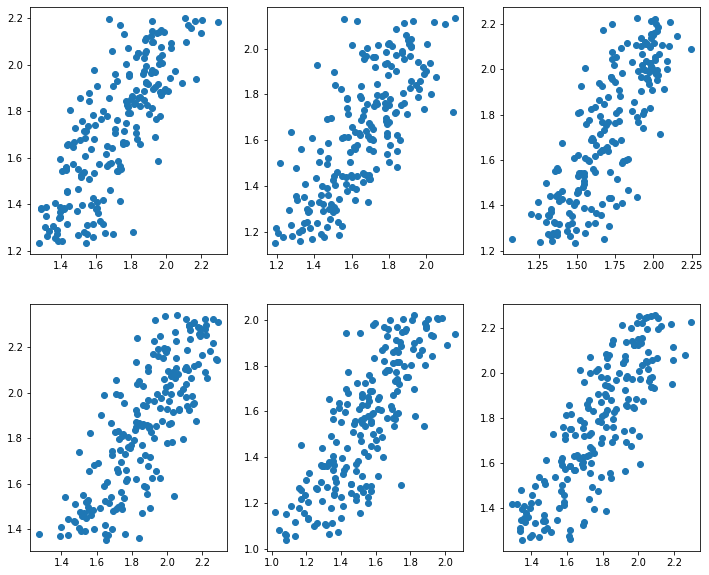

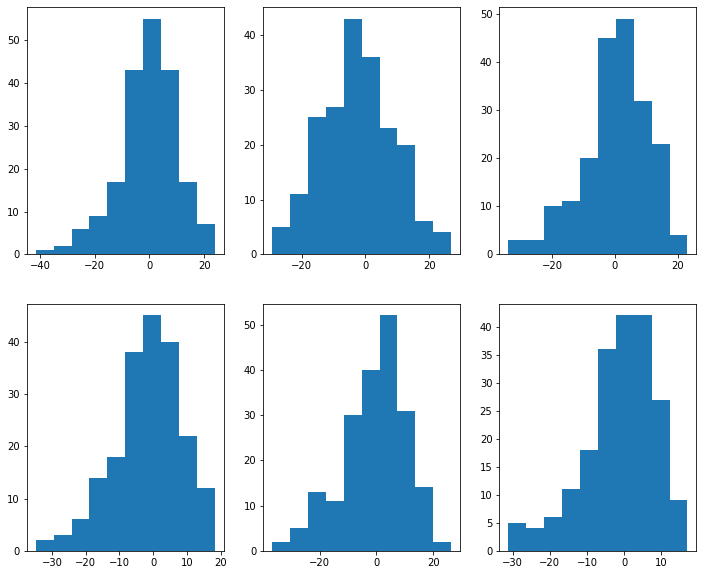

In [17]:
predictions = model.predict(in_ds_ts)

# Scatter plot
print("MAE:")
plt.figure(figsize=(12, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)

    plt.scatter(predictions[:, i], labels_ts[:, i])
    # Mean error
    print(100 * np.average(
        np.abs(predictions[:, i] - labels_ts[:, i]))/np.average(labels_ts[:, i]), "%")

# Histogram
print("RMSE:")
plt.figure(figsize=(12, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.hist((labels_ts[:, i]-predictions[:, i])/labels_ts[:, i]*100)
    print(np.sqrt(np.average(np.square((labels_ts[:, i]-predictions[:, i])/labels_ts[:, i]*100))), "%")